In [ ]:
pip install torch torchvision matplotlib wandb


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import torch
import wandb as w
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, Module
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [16]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),        
    transforms.Normalize(           
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [17]:
data_dir = "/home/avinash/dataDetection/GenImage/train"
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

In [18]:
torch.utils.data.random_split(full_dataset,[0.7,0.15,0.15])

In [14]:
train_size = int(0.7 * len(full_dataset))
val_size = int(0.15 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_ds, val_ds, test_ds = random_split(full_dataset, [train_size, val_size, test_size])

In [19]:


train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)


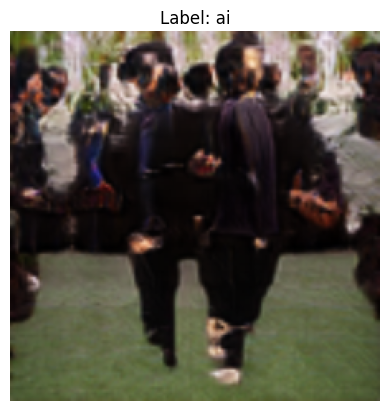

In [20]:
class_names = full_dataset.classes 

train_features, train_labels = next(iter(train_loader))

# Plot a single image
img = train_features[0].permute(1, 2, 0)  
img = img * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406]) 
img = img.clamp(0, 1)

plt.imshow(img)
plt.title(f"Label: {class_names[train_labels[0]]}")
plt.axis("off")
plt.show()

In [10]:



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = models.resnet18(pretrained=True)

num_features = model.fc.in_features  
model.fc = nn.Linear(num_features, 2)  

model = model.to(device)


